**Library**

In [1]:
import pandas as pd

**Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/1_Latihan Colabs/1_Education Under Attack 2020 to 2025/dataset_education_danger_incident.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


# **Preprocessing**

In [3]:
print(df)

            Date  Event Description  Country Country ISO  \
0     2025-05-25                NaN  Ukraine         UKR   
1     2025-05-24                NaN  Ukraine         UKR   
2     2025-05-24                NaN  Ukraine         UKR   
3     2025-05-22                NaN  Ukraine         UKR   
4     2025-05-12                NaN  Ukraine         UKR   
...          ...                ...      ...         ...   
4602  2020-01-05                NaN    Syria         SYR   
4603  2020-01-05                NaN  Burundi         BDI   
4604  2020-01-03                NaN    Libya         LBY   
4605  2020-01-01                NaN     Mali         MLI   
4606  2020-01-01                NaN    Syria         SYR   

                       Admin 1  Latitude  Longitude  \
0             Chernihiv Oblast      51.4       31.2   
1          Obolonskyi district      50.5       30.5   
2         Dniprovskyi district      50.4       30.5   
3               Donetsk Oblast      48.5       37.6   
4   

In [4]:
df.isnull().sum()

Date                                                0
Event Description                                4607
Country                                             0
Country ISO                                         0
Admin 1                                             4
Latitude                                          626
Longitude                                         626
Geo Precision                                       1
Location of event                                   4
Reported Perpetrator                                0
Reported Perpetrator Name                           0
Weapon Carried/Used                                 0
Type of education facility                          0
Attacks on Schools                                  0
Attacks on Universities                             0
Military Occupation of Education facility           0
Arson attack on education facility                  0
Forced Entry into education facility                0
Damage/Destruction To Ed facility Event             0
Attacks on Students and Teachers                    0
Educators Killed                                    0
Educators Injured                                   0
Educators Kidnapped                                 0
Educators Arrested                                  0
Known Educators Kidnap Or Arrest Outcome         3984
Students Attacked in School                         0
Students Killed                                     0
Students Injured                                    0
Students Kidnapped                                  0
Known Student Kidnap Or Arrest Outcome           4426
Students Arrested                                   0
Sexual Violence Affecting School Age Children       0
SiND Event ID                                       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df = df.dropna(subset=['Latitude'])
df = df.dropna(subset=['Longitude'])
df = df.dropna(subset=['Geo Precision'])

In [7]:
df['Admin 1'] = df['Admin 1'].fillna('Unknown')
df['Location of event'] = df['Location of event'].fillna('Unknown')

In [8]:
df['Event Description'] = df['Event Description'].fillna('-')

In [9]:
df['Known Educators Kidnap Or Arrest Outcome'] = df['Known Educators Kidnap Or Arrest Outcome'].fillna('Unknown')
df['Known Student Kidnap Or Arrest Outcome'] = df['Known Student Kidnap Or Arrest Outcome'].fillna('Unknown')

In [10]:
df.isnull().sum()

Date                                             0
Event Description                                0
Country                                          0
Country ISO                                      0
Admin 1                                          0
Latitude                                         0
Longitude                                        0
Geo Precision                                    0
Location of event                                0
Reported Perpetrator                             0
Reported Perpetrator Name                        0
Weapon Carried/Used                              0
Type of education facility                       0
Attacks on Schools                               0
Attacks on Universities                          0
Military Occupation of Education facility        0
Arson attack on education facility               0
Forced Entry into education facility             0
Damage/Destruction To Ed facility Event          0
Attacks on Students and Teachers                 0
Educators Killed                                 0
Educators Injured                                0
Educators Kidnapped                              0
Educators Arrested                               0
Known Educators Kidnap Or Arrest Outcome         0
Students Attacked in School                      0
Students Killed                                  0
Students Injured                                 0
Students Kidnapped                               0
Known Student Kidnap Or Arrest Outcome           0
Students Arrested                                0
Sexual Violence Affecting School Age Children    0
SiND Event ID                                    0
dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Year'] = df['Date'].dt.year

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3980 entries, 0 to 4606
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date                                           3980 non-null   datetime64[ns]
 1   Event Description                              3980 non-null   object        
 2   Country                                        3980 non-null   object        
 3   Country ISO                                    3980 non-null   object        
 4   Admin 1                                        3980 non-null   object        
 5   Latitude                                       3980 non-null   float64       
 6   Longitude                                      3980 non-null   float64       
 7   Geo Precision                                  3980 non-null   object        
 8   Location of event                              3980 non-null   

In [13]:
df.describe()

Date     Latitude    Longitude  \
count                           3980  3980.000000  3980.000000   
mean   2022-12-26 19:44:33.768844288    22.861859    44.775955   
min              2020-01-01 00:00:00   -38.600000  -120.800000   
25%              2021-10-02 18:00:00    12.400000    28.900000   
50%              2023-02-20 00:00:00    21.100000    37.300000   
75%              2024-03-19 00:00:00    35.600000    93.900000   
max              2025-05-25 00:00:00    56.800000   144.100000   
std                              NaN    16.426678    43.862892   

       Attacks on Schools  Attacks on Universities  \
count         3980.000000              3980.000000   
mean             0.594221                 0.084422   
min              0.000000                 0.000000   
25%              0.000000                 0.000000   
50%              1.000000                 0.000000   
75%              1.000000                 0.000000   
max              1.000000                 1.000000   
std              0.491104                 0.278055   

       Military Occupation of Education facility  \
count                                3980.000000   
mean                                    0.087940   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   
std                                     0.283243   

       Arson attack on education facility  \
count                         3980.000000   
mean                             0.077387   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              0.000000   
max                              1.000000   
std                              0.267238   

       Forced Entry into education facility  \
count                           3980.000000   
mean                               0.116834   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                1.000000   
std                                0.321263   

       Damage/Destruction To Ed facility Event  Educators Killed  ...  \
count                              3980.000000       3980.000000  ...   
mean                                  0.463065          0.130151  ...   
min                                   0.000000          0.000000  ...   
25%                                   0.000000          0.000000  ...   
50%                                   0.000000          0.000000  ...   
75%                                   1.000000          0.000000  ...   
max                                   1.000000         11.000000  ...   
std                                   0.498697          0.460171  ...   

       Educators Kidnapped  Educators Arrested  Students Attacked in School  \
count          3980.000000         3980.000000                  3980.000000   
mean              0.149497            0.393970                     1.454523   
min               0.000000            0.000000                     0.000000   
25%               0.000000            0.000000                     0.000000   
50%               0.000000            0.000000                     0.000000   
75%               0.000000            0.000000                     0.000000   
max              25.000000          250.000000                   347.000000   
std               0.936277            4.969681                    11.175526   

       Students Killed  Students Injured  Students Kidnapped  \
count      3980.000000       3980.000000         3980.000000   
mean          0.141457          0.590955            0.507789   
min           0.000000          0.000000            0.000000   
25%           0.000000   

In [14]:
print(df)

           Date Event Description  Country Country ISO  \
0    2025-05-25                 -  Ukraine         UKR   
1    2025-05-24                 -  Ukraine         UKR   
2    2025-05-24                 -  Ukraine         UKR   
3    2025-05-22                 -  Ukraine         UKR   
4    2025-05-12                 -  Ukraine         UKR   
...         ...               ...      ...         ...   
4602 2020-01-05                 -    Syria         SYR   
4603 2020-01-05                 -  Burundi         BDI   
4604 2020-01-03                 -    Libya         LBY   
4605 2020-01-01                 -     Mali         MLI   
4606 2020-01-01                 -    Syria         SYR   

                       Admin 1  Latitude  Longitude  \
0             Chernihiv Oblast      51.4       31.2   
1          Obolonskyi district      50.5       30.5   
2         Dniprovskyi district      50.4       30.5   
3               Donetsk Oblast      48.5       37.6   
4                  Sumy Obla

# **Visualisasi 1**

**Visualisasi Geografis Kejadian**

In [34]:
import folium

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
education_map = folium.Map(location=map_center, zoom_start=2)

for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Country: {row['Country']}<br>Date: {row['Date'].strftime('%Y-%m-%d')}<br>Location: {row['Location of event']}").add_to(education_map)

education_map

**Analisis Pelaku yang Dilaporkan**

Jumlah Kejadian per Pelaku yang Dilaporkan:
Reported Perpetrator
NSA                          1194
Other                        1033
Foreign Forces - Military     712
No Information                452
Police                        232
Multiple                      105
Vigilante                      66
Criminal                       58
Civilian                       52
Host Government: Military      26
Protestors                     22
Employee                       21
Political Party                 5
Donor Government                2
Name: count, dtype: int64


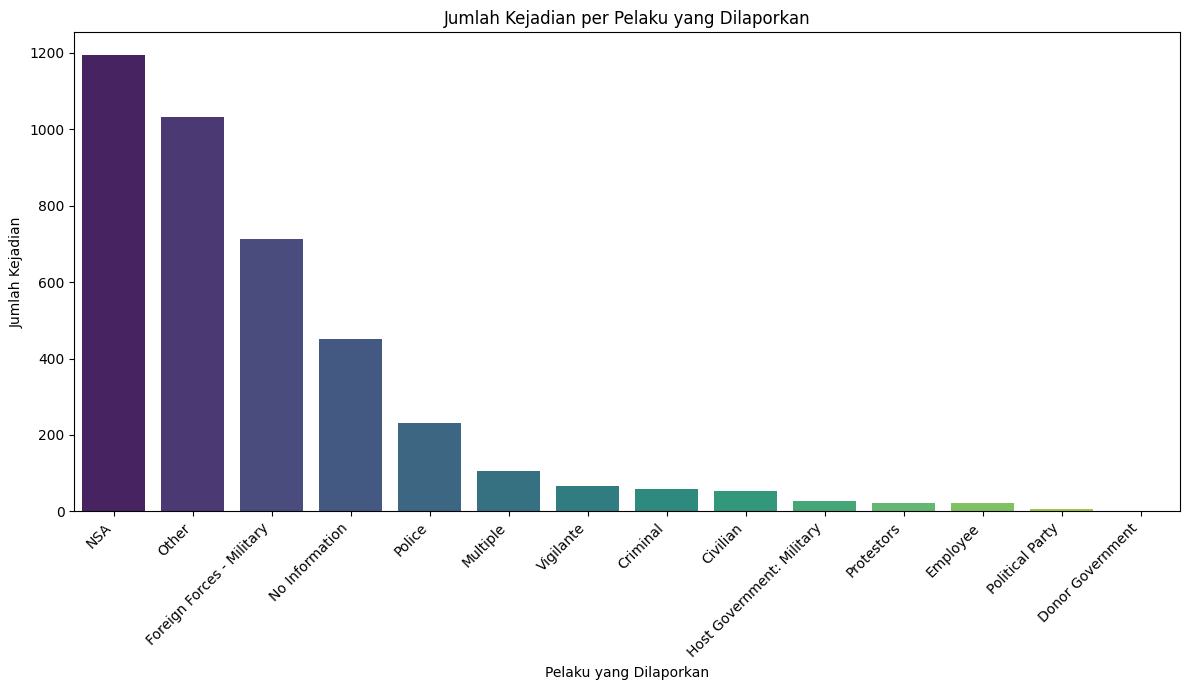

In [35]:
perpetrator_counts = df['Reported Perpetrator'].value_counts()

print("Jumlah Kejadian per Pelaku yang Dilaporkan:")
print(perpetrator_counts)

plt.figure(figsize=(12, 7))
sns.barplot(x=perpetrator_counts.index, y=perpetrator_counts.values, hue=perpetrator_counts.index, palette='viridis', legend=False)
plt.title('Jumlah Kejadian per Pelaku yang Dilaporkan')
plt.xlabel('Pelaku yang Dilaporkan')
plt.ylabel('Jumlah Kejadian')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Analisis Dampak pada Siswa dan Pendidik**

Total Dampak pada Siswa dan Pendidik (2020-2025):
Educators Killed        518
Educators Injured       543
Educators Kidnapped     595
Educators Arrested     1568
Students Killed         563
Students Injured       2352
Students Kidnapped     2021
Students Arrested       994
dtype: int64


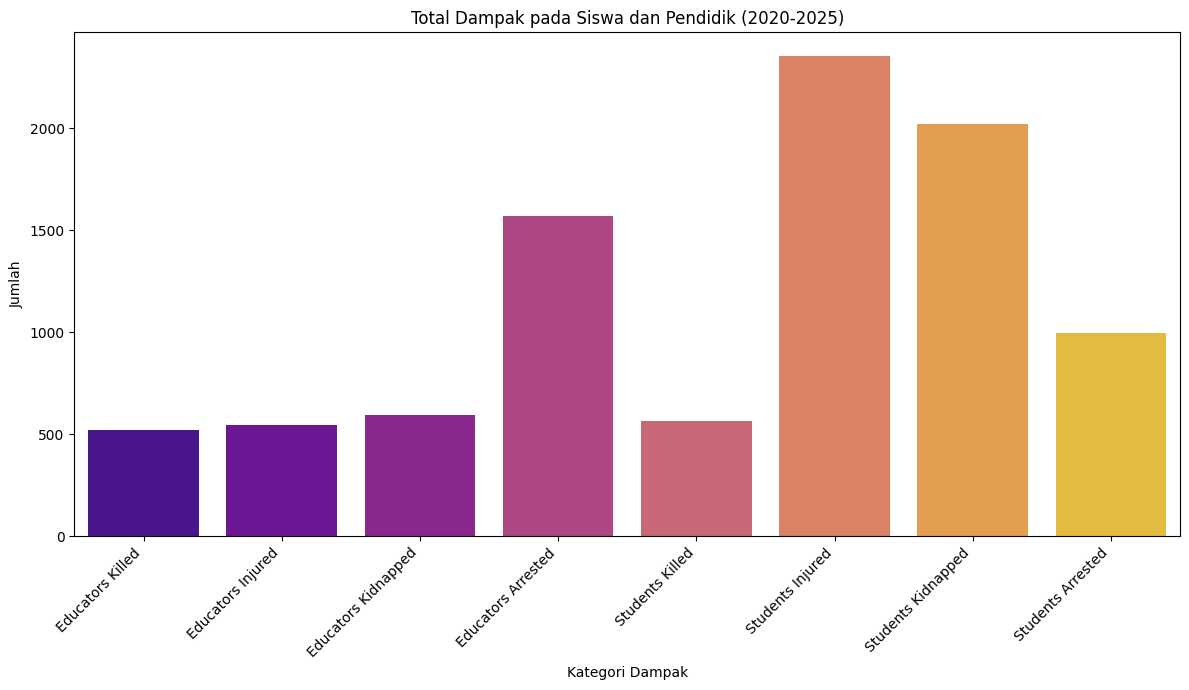

In [36]:
impact_columns = ['Educators Killed', 'Educators Injured', 'Educators Kidnapped', 'Educators Arrested',
                  'Students Killed', 'Students Injured', 'Students Kidnapped', 'Students Arrested']

total_impact = df[impact_columns].sum()

print("Total Dampak pada Siswa dan Pendidik (2020-2025):")
print(total_impact)

plt.figure(figsize=(12, 7))
sns.barplot(x=total_impact.index, y=total_impact.values, hue=total_impact.index, palette='plasma', legend=False)
plt.title('Total Dampak pada Siswa dan Pendidik (2020-2025)')
plt.xlabel('Kategori Dampak')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Visualisasi tren global per tahun**

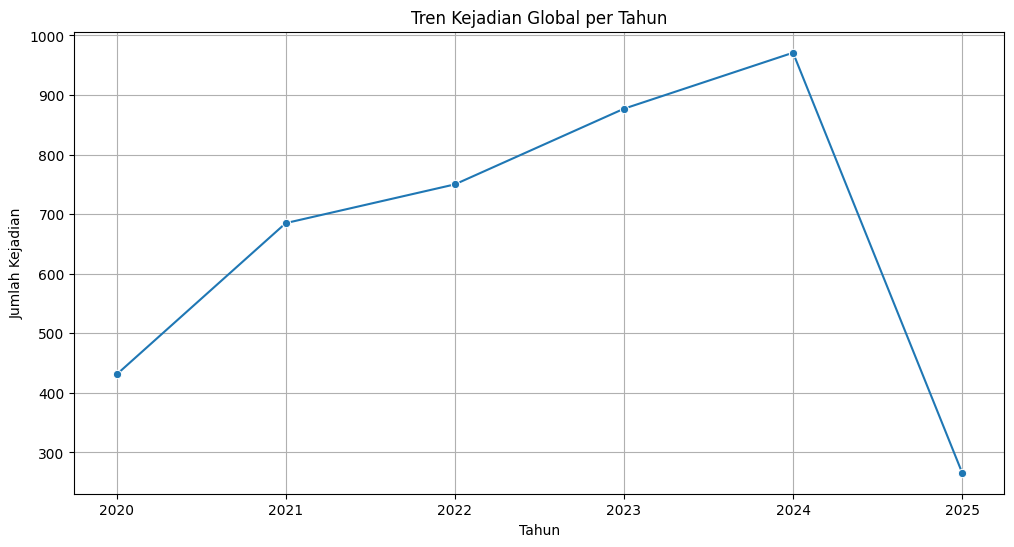

In [29]:
yearly_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title('Tren Kejadian Global per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejadian')
plt.grid(True)
plt.show()

**Analisis tren per wilayah/negara**

In [37]:
yearly_country_counts = df.groupby(['Year', 'Country']).size().reset_index(name='Incident Count')

N = 10
top_countries = yearly_country_counts.groupby('Country')['Incident Count'].sum().nlargest(N).index.tolist()

top_countries_yearly_counts = yearly_country_counts[yearly_country_counts['Country'].isin(top_countries)]

print("Top 10 Countries by Total Incident Count:")
print(top_countries)

Top 10 Countries by Total Incident Count:
['Myanmar', 'Ukraine', 'Syria', 'Nigeria', 'Ethiopia', 'Yemen', 'Burkina Faso', 'Sudan', 'Afghanistan', 'DRC']


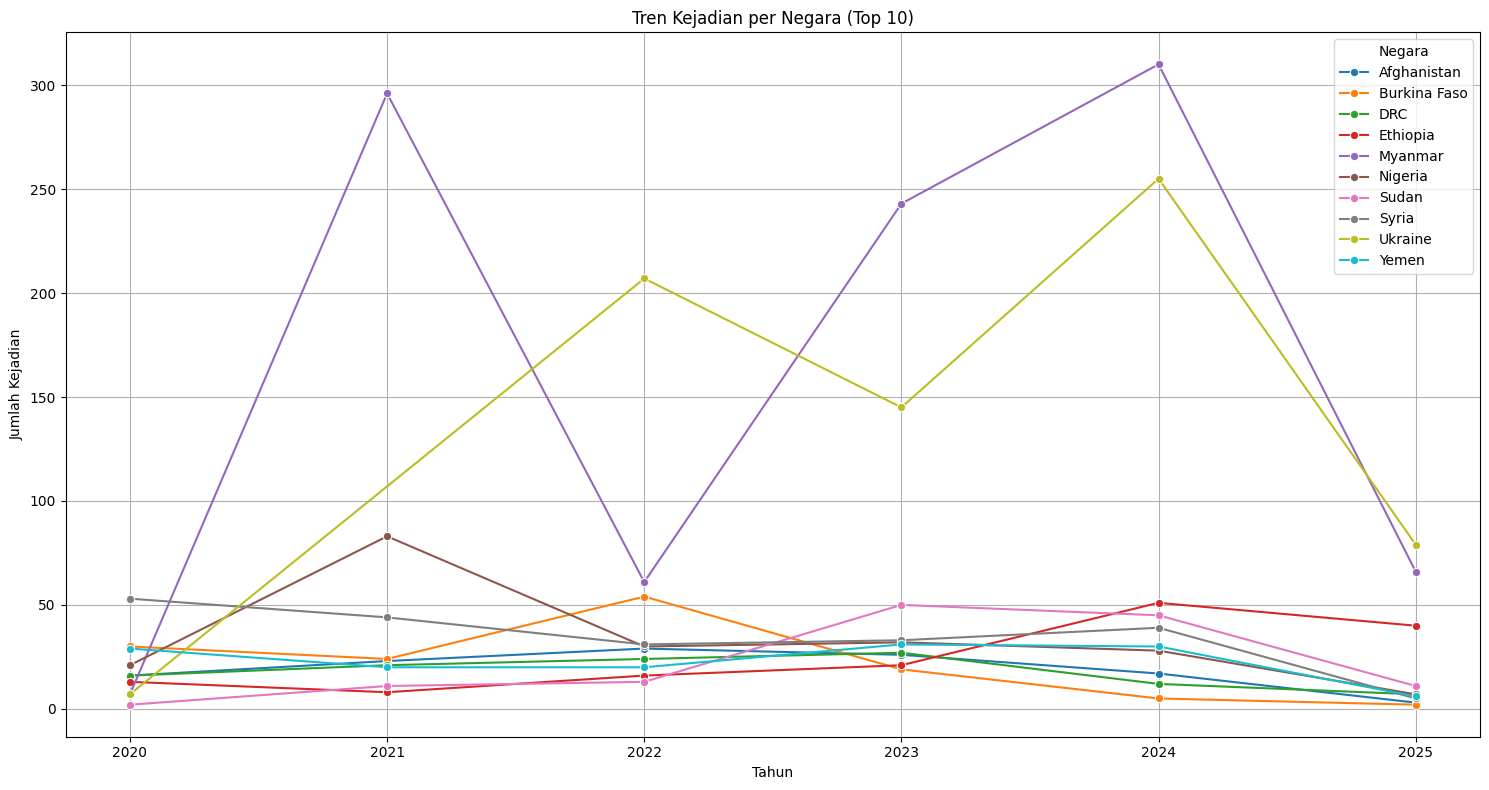

In [38]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_countries_yearly_counts, x='Year', y='Incident Count', hue='Country', marker='o')

plt.title('Tren Kejadian per Negara (Top 10)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejadian')
plt.grid(True)
plt.legend(title='Negara')
plt.xticks(top_countries_yearly_counts['Year'].unique())
plt.tight_layout()
plt.show()

# **Machine Learning**

**Feature engineering**

In [46]:
df['Month'] = df['Date'].dt.month

def categorize_risk(row):
    total_casualties = row['Students Killed'] + row['Students Injured'] + row['Educators Killed'] + row['Educators Injured']
    if total_casualties == 0:
        return 0 # Low risk
    elif total_casualties <= 5:
        return 1 # Medium risk
    else:
        return 2 # High risk

df['Risk_Level'] = df.apply(categorize_risk, axis=1)
df.head()

Date Event Description  Country Country ISO               Admin 1  \
0 2025-05-25                 -  Ukraine         UKR      Chernihiv Oblast   
1 2025-05-24                 -  Ukraine         UKR   Obolonskyi district   
2 2025-05-24                 -  Ukraine         UKR  Dniprovskyi district   
3 2025-05-22                 -  Ukraine         UKR        Donetsk Oblast   
4 2025-05-12                 -  Ukraine         UKR           Sumy Oblast   

   Latitude  Longitude         Geo Precision    Location of event  \
0      51.4       31.2  (2) 25 km Precision   Education Building    
1      50.5       30.5  (2) 25 km Precision   Education Building    
2      50.4       30.5  (2) 25 km Precision   Education Building    
3      48.5       37.6  (2) 25 km Precision   Education Building    
4      50.9       34.2  (2) 25 km Precision   Education Building    

        Reported Perpetrator  ... Students Killed Students Injured  \
0  Foreign Forces - Military  ...               0                0   
1  Foreign Forces - Military  ...               0                0   
2  Foreign Forces - Military  ...               0                0   
3                      Other  ...               0                0   
4  Foreign Forces - Military  ...               0                0   

  Students Kidnapped  Known Student Kidnap Or Arrest Outcome  \
0                  0                                 Unknown   
1                  0                                 Unknown   
2                  0                                 Unknown   
3                  0                                 Unknown   
4                  0                                 Unknown   

   Students Arrested  Sexual Violence Affecting School Age Children  \
0                  0                                              0   
1                  0                                              0   
2                  0                                              0   
3                  0                                              0   
4                  0                                              0   

   SiND Event ID  Year  Month  Risk_Level  
0         100323  2025      5           0  
1         100318  2025      5           0  
2         100317  2025      5           0  
3         100315  2025      5           0  
4          99014  2025      5           0  

[5 rows x 36 columns]

In [47]:
monthly_incidents = df.groupby(['Country', 'Admin 1', 'Year', 'Month']).size().reset_index(name='Monthly_Incident_Count')
df = pd.merge(df, monthly_incidents, on=['Country', 'Admin 1', 'Year', 'Month'], how='left')
df.head()

Date Event Description  Country Country ISO               Admin 1  \
0 2025-05-25                 -  Ukraine         UKR      Chernihiv Oblast   
1 2025-05-24                 -  Ukraine         UKR   Obolonskyi district   
2 2025-05-24                 -  Ukraine         UKR  Dniprovskyi district   
3 2025-05-22                 -  Ukraine         UKR        Donetsk Oblast   
4 2025-05-12                 -  Ukraine         UKR           Sumy Oblast   

   Latitude  Longitude         Geo Precision    Location of event  \
0      51.4       31.2  (2) 25 km Precision   Education Building    
1      50.5       30.5  (2) 25 km Precision   Education Building    
2      50.4       30.5  (2) 25 km Precision   Education Building    
3      48.5       37.6  (2) 25 km Precision   Education Building    
4      50.9       34.2  (2) 25 km Precision   Education Building    

        Reported Perpetrator  ... Students Injured Students Kidnapped  \
0  Foreign Forces - Military  ...                0                  0   
1  Foreign Forces - Military  ...                0                  0   
2  Foreign Forces - Military  ...                0                  0   
3                      Other  ...                0                  0   
4  Foreign Forces - Military  ...                0                  0   

  Known Student Kidnap Or Arrest Outcome  Students Arrested  \
0                                Unknown                  0   
1                                Unknown                  0   
2                                Unknown                  0   
3                                Unknown                  0   
4                                Unknown                  0   

   Sexual Violence Affecting School Age Children  SiND Event ID  Year  Month  \
0                                              0         100323  2025      5   
1                                              0         100318  2025      5   
2                                              0         100317  2025      5   
3                                              0         100315  2025      5   
4                                              0          99014  2025      5   

   Risk_Level  Monthly_Incident_Count  
0           0                       1  
1           0                       1  
2           0                       1  
3           0                       3  
4           0                       1  

[5 rows x 37 columns]

**Data preparation for modeling**

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split

features = ['Year', 'Latitude', 'Longitude', 'Attacks on Schools', 'Attacks on Universities',
            'Military Occupation of Education facility', 'Arson attack on education facility',
            'Forced Entry into education facility', 'Damage/Destruction To Ed facility Event',
            'Attacks on Students and Teachers', 'Educators Killed', 'Educators Injured',
            'Educators Kidnapped', 'Educators Arrested', 'Students Attacked in School',
            'Students Killed', 'Students Injured', 'Students Kidnapped', 'Students Arrested',
            'Sexual Violence Affecting School Age Children', 'Monthly_Incident_Count']
target = 'Risk_Level'

X = df[features]
y = df[target]

In [49]:
categorical_features = X.select_dtypes(include=['object', 'bool']).columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3184, 21)
Testing set shape: (796, 21)


**Model selection**

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Chosen model: RandomForestClassifier")

Chosen model: RandomForestClassifier


**Model training**

In [52]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model evaluation**

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9937185929648241
Precision: 0.9939238677045358
Recall: 0.9937185929648241
F1-score: 0.9934744713349232


**Risk zone identification**

In [54]:
df['predicted_risk_level'] = model.predict(X)
high_risk_zones = df[df['predicted_risk_level'] == 2]
display(high_risk_zones.head())

Date Event Description   Country Country ISO        Admin 1  \
190 2025-01-30                 -   Nigeria         NGA  Plateau State   
356 2024-11-29                 -  Ethiopia         ETH  Amhara Region   
440 2024-11-05                 -  Ethiopia         ETH  Amhara Region   
460 2024-11-01                 -  Pakistan         PAK    Balochistan   
461 2024-11-01                 -  Pakistan         PAK    Balochistan   

     Latitude  Longitude                      Geo Precision  \
190       9.0        9.6  (4) Province, State, Governorate    
356      11.4       37.1               (2) 25 km Precision    
440      11.5       36.7               (2) 25 km Precision    
460      29.7       66.8               (2) 25 km Precision    
461      29.8       66.8               (2) 25 km Precision    

       Location of event Reported Perpetrator  ... Students Kidnapped  \
190  Education Building                   NSA  ...                  0   
356  Education Building                 Other  ...                  0   
440  Education Building                 Other  ...                  0   
460  Education Building                   NSA  ...                  0   
461      Public Building                  NSA  ...                  0   

    Known Student Kidnap Or Arrest Outcome Students Arrested  \
190                                Unknown                 0   
356                                Unknown                 0   
440                                Unknown                 0   
460                                Unknown                 0   
461                                Unknown                 0   

     Sexual Violence Affecting School Age Children  SiND Event ID  Year  \
190                                              0          93373  2025   
356                                              0          87649  2024   
440                                              0          86853  2024   
460                                              0          88117  2024   
461                                              0          88693  2024   

     Month  Risk_Level  Monthly_Incident_Count  predicted_risk_level  
190      1           2                       1                     2  
356     11           2                      15                     2  
440     11           2                      15                     2  
460     11           2                       3                     2  
461     11           2                       3                     2  

[5 rows x 38 columns]

**Visualization of risk zones**

In [55]:
import folium

map_center = [high_risk_zones['Latitude'].mean(), high_risk_zones['Longitude'].mean()]
high_risk_map = folium.Map(location=map_center, zoom_start=2)

for index, row in high_risk_zones.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Country: {row['Country']}<br>Date: {row['Date'].strftime('%Y-%m-%d')}<br>Location: {row['Location of event']}").add_to(high_risk_map)

high_risk_map

## Summary:

### Data Analysis Key Findings

*   The analysis successfully created a 'Risk\_Level' feature by categorizing incidents based on the total number of casualties, with 0 indicating low risk, 1 for medium risk (up to 5 casualties), and 2 for high risk (more than 5 casualties).
*   A 'Monthly\_Incident\_Count' feature was engineered by aggregating the number of incidents per country, administrative region, year, and month.
*   A `RandomForestClassifier` model was selected and trained to predict the 'Risk\_Level'.
*   The trained model demonstrated high performance on the test set with an accuracy of 0.9937, precision of 0.9939, recall of 0.9937, and an F1-score of 0.9935.
*   The model was used to predict risk levels across the entire dataset, and incidents predicted as high risk (level 2) were identified.
*   The identified high-risk zones were successfully visualized on a map using `folium`, with markers indicating the location of each high-risk incident and providing details on country, date, and location in popups.

### Insights or Next Steps

*   The high performance metrics suggest the model is very effective at identifying high-risk zones based on the current features. Further investigation could explore feature importance to understand which factors contribute most to high risk.
*   The visualization on the map provides a clear geographical representation of high-risk areas, which can be used for targeted intervention and resource allocation. The next step could involve exploring temporal trends within these high-risk zones.
